In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.frequent_patterns import apriori, association_rules
import german_helper
import importlib
importlib.reload(german_helper)

C:\Users\ckevi\AppData\Local\Temp\ipykernel_10640\3799681351.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<module 'german_helper' from 'c:\\Users\\ckevi\\OneDrive\\Desktop\\study materials\\Purdue\\Research\\Fairness\\research code\\Fairness-Research\\german_helper.py'>

In [2]:
dirty_df = pd.read_csv('german.data', sep='\s+', header=None,index_col=0)
dirty_df.to_csv('my_file.csv',header=None)

<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\s'
C:\Users\ckevi\AppData\Local\Temp\ipykernel_39016\561275803.py:1: DeprecationWarning: invalid escape sequence '\s'
  dirty_df = pd.read_csv('german.data', sep='\s+', header=None,index_col=0)


In [38]:
dirty_df = pd.read_csv('my_file.csv')
clean_df = pd.read_csv('Cleaned_German.csv')

In [39]:
clean_df.columns = [col.capitalize() for col in clean_df.columns]

clean_df.columns = [col.replace('_', '-') for col in clean_df.columns]

clean_df = clean_df.rename(columns={'Employment': 'Present-employment',
                                    'Installment-plans': 'Other-installment',
                                    'Savings':'Savings-account',
                                    'Residence-since':'Present-residence'
                                    })


In [40]:
clean_df = german_helper.preprocessData(clean_df,True)
clean_df.head()

c:\Users\ckevi\OneDrive\Desktop\study materials\Purdue\Research\Fairness\research code\Fairness-Research\german_helper.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


,Month,Credit-amount,Investment-as-income-percentage,Present-residence,Age,Number-of-credits,People-liable-for,Sex,Status,Housing,Skill-level,Telephone,Foreign-worker,Other-installment,Other-debtors,Credit-history,Purpose,Savings-account,Present-employment,Property
0,14,1,4,4,1,1,1,0,4,1,2,1,1,3,1,3,3,3,3,3
1,43,4,4,4,1,2,1,1,1,3,3,2,1,3,1,5,2,1,5,4
2,28,2,4,2,1,1,1,0,3,3,3,2,1,3,1,3,4,2,5,4
3,25,2,4,2,1,2,1,1,2,2,3,1,1,2,1,4,10,2,5,2
4,32,3,4,1,1,1,2,0,2,2,3,2,1,3,1,3,10,1,2,2


In [41]:
clean_df['Age'].value_counts()

Age
1    810
0    190
Name: count, dtype: int64

In [42]:
dirty_df = german_helper.preprocessData(dirty_df)

c:\Users\ckevi\OneDrive\Desktop\study materials\Purdue\Research\Fairness\research code\Fairness-Research\german_helper.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


In [43]:
clean_df['target']= dirty_df['target']

In [11]:
dirty_df.to_csv("Preprocessed_German.csv",index=False)

In [44]:
german_helper.getParityforClasses(dirty_df)

1.0 1.0 nan nan 1.0
1.0 1.0 nan nan 1.0
----------------------------------------
1.0 1.0 nan nan 1.0
1.0 1.0 nan nan 1.0
----------------------------------------
0.818181818181818 0.818181818181818 nan nan 0.818181818181818
0.7333333333333333 0.7333333333333333 nan nan 0.7333333333333333
----------------------------------------
0.8 0.8 nan nan 0.8
0.875 0.875 nan nan 0.875
----------------------------------------
0.7833333333333333 0.7833333333333333 nan nan 0.7833333333333333
0.7 0.7 nan nan 0.7
----------------------------------------
0.8518518518518519 0.8518518518518519 nan nan 0.8518518518518519
0.7222222222222222 0.7222222222222222 nan nan 0.7222222222222222
----------------------------------------


In [10]:
clean_df.head()

,Month,Credit-amount,Investment-as-income-percentage,Present-residence,Age,Number-of-credits,People-liable-for,Sex,Status,Housing,...,Telephone,Foreign-worker,Other-installment,Other-debtors,Credit-history,Purpose,Savings-account,Present-employment,Property,target
0,14,1,4,4,1,1,1,0,4,1,...,1,1,3,1,3,3,3,3,3,1
1,43,4,4,4,1,2,1,1,1,3,...,2,1,3,1,5,2,1,5,4,2
2,28,2,4,2,1,1,1,0,3,3,...,2,1,3,1,3,4,2,5,4,1
3,25,2,4,2,1,2,1,1,2,2,...,1,1,2,1,4,10,2,5,2,1
4,32,3,4,1,1,1,2,0,2,2,...,2,1,3,1,3,10,1,2,2,2


In [11]:
german_helper.getParityforClasses(clean_df)


0.8461538461538461 0.8461538461538461 0.7142857142857143 0.7142857142857143 0.8461538461538461
0.4578313253012048 0.4578313253012048 0.2857142857142857 0.2857142857142857 0.4578313253012048
----------------------------------------
0.8317307692307693 0.8317307692307693 0.7222222222222222 0.7222222222222222 0.8317307692307693
0.3591549295774648 0.3591549295774648 0.2777777777777778 0.2777777777777778 0.3591549295774648
----------------------------------------
0.7626262626262625 0.7626262626262625 0.6666666666666667 0.6666666666666667 0.7626262626262625
0.37254901960784315 0.37254901960784315 0.3333333333333333 0.3333333333333333 0.37254901960784315
----------------------------------------
0.7682926829268293 0.7682926829268293 0.6904761904761905 0.6904761904761905 0.7682926829268293
0.3371212121212121 0.3371212121212121 0.30952380952380953 0.30952380952380953 0.3371212121212121
----------------------------------------
0.7374045801526717 0.7374045801526717 0.692063492063492 0.6920634920634

In [13]:
german_helper.calculateIndependence(dirty_df)

Associations between 'target' and other columns:
             Attribute  Chi-Square       P-Value
0     Checking-Account  123.720944  1.218902e-26
2       Credit-history   61.691397  1.279187e-12
5      Savings-account   36.098928  2.761214e-07
4        Credit-amount   27.314286  5.058476e-06
1             Duration   78.886937  7.784572e-06
11            Property   23.719551  2.858442e-05
14             Housing   18.199842  1.116747e-04
3              Purpose   33.356447  1.157491e-04
6   Present-employment   18.368274  1.045452e-03
13   Other-installment   12.839188  1.629318e-03
12                 Age    9.375168  2.199446e-03
19      Foreign-worker    5.821576  1.583075e-02
8           Status/sex    9.605214  2.223801e-02
9        Other-debtors    6.645367  3.605595e-02
7     Installment-rate    5.476792  1.400333e-01
18           Telephone    1.172559  2.788762e-01
15    Existing-credits    2.671198  4.451441e-01
16                 Job    1.885156  5.965816e-01
10   Present-residen

,Attribute,Chi-Square,P-Value
0,Checking-Account,123.720944,1.218902e-26
2,Credit-history,61.691397,1.279187e-12
5,Savings-account,36.098928,2.761214e-07
4,Credit-amount,27.314286,5.058476e-06
1,Duration,78.886937,7.784572e-06
11,Property,23.719551,2.858442e-05
14,Housing,18.199842,1.116747e-04
3,Purpose,33.356447,1.157491e-04
6,Present-employment,18.368274,1.045452e-03
13,Other-installment,12.839188,1.629318e-03


In [14]:
german_helper.calculateIndependence(clean_df)


Associations between 'target' and other columns:
                          Attribute  Chi-Square   P-Value
14                    Other-debtors    7.174587  0.027673
13                Other-installment    3.989434  0.136052
19                         Property    5.477373  0.139998
2   Investment-as-income-percentage    5.077836  0.166186
18               Present-employment    5.785285  0.215767
3                 Present-residence    3.879763  0.274744
11                        Telephone    1.172559  0.278876
16                          Purpose   10.578763  0.305690
4                               Age    0.935982  0.333313
8                            Status    3.250896  0.354536
17                  Savings-account    4.025128  0.402616
0                             Month   27.878617  0.627424
15                   Credit-history    2.580274  0.630321
9                           Housing    0.915169  0.632810
1                     Credit-amount    1.716614  0.633247
7                      

,Attribute,Chi-Square,P-Value
14,Other-debtors,7.174587,0.027673
13,Other-installment,3.989434,0.136052
19,Property,5.477373,0.139998
2,Investment-as-income-percentage,5.077836,0.166186
18,Present-employment,5.785285,0.215767
3,Present-residence,3.879763,0.274744
11,Telephone,1.172559,0.278876
16,Purpose,10.578763,0.305690
4,Age,0.935982,0.333313
8,Status,3.250896,0.354536


In [15]:

transactions = []
for index, row in dirty_df.iterrows():
    transaction = [f"{col}={val}" for col, val in row.items()]
    transactions.append(transaction)

min_support_percentage = 0.3
targets = ['target=1', 'target=2']
target_frequent_itemsets, support_count = german_helper.run_eclat(transactions, min_support_percentage,targets)

# Calculate confidence for each itemset
rules_with_confidence = german_helper.calculate_confidence(target_frequent_itemsets, support_count,targets)


print("\nRules with Confidence:")
for antecedent, consequent, support, confidence in rules_with_confidence:
    print("Rule: {} -> {}, Support: {}, Confidence: {}".format(set(antecedent), set(consequent), support, confidence))



Rules with Confidence:
Rule: {'Other-installment=3', 'Checking-Account=4'} -> {'target=1'}, Support: 303, Confidence: 0.9181818181818182
Rule: {'Age=2', 'Checking-Account=4', 'Other-debtors=1'} -> {'target=1'}, Support: 302, Confidence: 0.893491124260355
Rule: {'Age=2', 'Checking-Account=4'} -> {'target=1'}, Support: 318, Confidence: 0.8932584269662921
Rule: {'Foreign-worker=1', 'Age=2', 'Checking-Account=4'} -> {'target=1'}, Support: 305, Confidence: 0.8892128279883382
Rule: {'Other-debtors=1', 'Checking-Account=4'} -> {'target=1'}, Support: 331, Confidence: 0.8873994638069705
Rule: {'Foreign-worker=1', 'Other-debtors=1', 'Checking-Account=4'} -> {'target=1'}, Support: 320, Confidence: 0.8839779005524862
Rule: {'Checking-Account=4'} -> {'target=1'}, Support: 348, Confidence: 0.883248730964467
Rule: {'Foreign-worker=1', 'Checking-Account=4'} -> {'target=1'}, Support: 335, Confidence: 0.8792650918635171
Rule: {'Age=2', 'Other-installment=3', 'Housing=2'} -> {'target=1'}, Support: 405, 

In [45]:
transactions = []
for index, row in clean_df.iterrows():
    transaction = [f"{col}={val}" for col, val in row.items()]
    transactions.append(transaction)

min_support_percentage = 0.3
targets = ['target=1', 'target=2']
target_frequent_itemsets, support_count = german_helper.run_eclat(transactions, min_support_percentage,targets)

# Calculate confidence for each itemset
rules_with_confidence = german_helper.calculate_confidence(target_frequent_itemsets, support_count,targets)

# print("Frequent Itemsets containing the target:")
# for itemset, support in target_frequent_itemsets:
#     print("Itemset:", itemset, "Support:", support)

print("\nRules with Confidence:")
for antecedent, consequent, support, confidence in rules_with_confidence:
    print("Rule: {} -> {}, Support: {}, Confidence: {}".format(set(antecedent), set(consequent), support, confidence))


Rules with Confidence:
Rule: {'Foreign-worker=1', 'Credit-history=3', 'Other-debtors=1'} -> {'target=1'}, Support: 336, Confidence: 0.7336244541484717
Rule: {'Foreign-worker=1', 'Number-of-credits=1', 'Credit-history=3', 'Other-debtors=1'} -> {'target=1'}, Support: 302, Confidence: 0.7312348668280871
Rule: {'Other-debtors=1', 'Credit-history=3', 'People-liable-for=1'} -> {'target=1'}, Support: 303, Confidence: 0.7301204819277108
Rule: {'Credit-history=3', 'Other-debtors=1'} -> {'target=1'}, Support: 344, Confidence: 0.7288135593220338
Rule: {'Other-installment=3', 'Foreign-worker=1', 'Credit-history=3'} -> {'target=1'}, Support: 314, Confidence: 0.7268518518518519
Rule: {'Savings-account=1', 'People-liable-for=1', 'Foreign-worker=1', 'Other-debtors=1'} -> {'target=1'}, Support: 321, Confidence: 0.7262443438914027
Rule: {'Number-of-credits=1', 'Credit-history=3', 'Other-debtors=1'} -> {'target=1'}, Support: 310, Confidence: 0.7259953161592506
Rule: {'Foreign-worker=1', 'Credit-history=

In [46]:


clean_df['Age'] = np.where(clean_df['Age'] == 0, 1, 2)

# Using Age as category

In [18]:
german_helper.calculateParityusingKNN(dirty_df)

0.625
0.7440476190476191
----------------------------------------
0.703125
0.7529761904761905
----------------------------------------
0.7083333333333333
0.7579365079365079
----------------------------------------
0.703125
0.7470238095238095
----------------------------------------
0.7125000000000001
0.7428571428571428
----------------------------------------
0.703125
0.744047619047619
----------------------------------------


Logistic Regression

In [19]:
german_helper.calculateParityusingLR(dirty_df)

0.5549451843949365
0.7098799194683332
----------------------------------------


In [20]:

german_helper.calculateParityusingLR(clean_df)

0.715572537118799
0.6874252096079484
----------------------------------------


In [21]:
german_helper.calculateParityusingKNN(clean_df)

0.6923076923076923
0.7241379310344828
----------------------------------------
0.7115384615384616
0.7241379310344828
----------------------------------------
0.7051282051282051
0.7183908045977011
----------------------------------------
0.7307692307692307
0.7169540229885057
----------------------------------------
0.7153846153846156
0.7091954022988505
----------------------------------------
0.7307692307692307
0.7030651340996169
----------------------------------------


Support:

Support is a measure of how frequently an itemset appears in the dataset.
In the Eclat algorithm, the support of an itemset is the number of transactions that contain that itemset.
The min_support parameter is a threshold value. Itemsets with support greater than or equal to min_support are considered frequent.


Confidence:

Confidence is a measure of the reliability of a rule in association rule mining.
In the context of the Eclat algorithm, confidence is calculated when generating association rules based on frequent itemsets.
For a rule X -> Y, where X and Y are itemsets, confidence is the ratio of the support of the combined itemset (X U Y) to the support of the antecedent (X).
The confidence of a rule is calculated as follows: confidence = support(X U Y) / support(X)

In [48]:
clean_sampled_dfs = german_helper.createSamples(clean_df)

dirty_sampled_dfs = german_helper.createSamples(dirty_df)

In [49]:
import pandas as pd
id=1
confidence_values=[]
support_values=[]
for sample_df in clean_sampled_dfs:
  transactions = []
  for index, row in sample_df.iterrows():
      transaction = [f"{col}={val}" for col, val in row.items()]
      transactions.append(transaction)

  min_support_percentage = 0.3
  targets = ['target=1', 'target=2']
  target_frequent_itemsets, support_count = german_helper.run_eclat(transactions, min_support_percentage,targets)

  # Calculate confidence for each itemset
  rules_with_confidence = german_helper.calculate_confidence(target_frequent_itemsets, support_count,targets)


  # print(f"\nRules with Confidence for id {id}:")
  for antecedent, consequent, support, confidence in rules_with_confidence:
    confidence_values.append(confidence)
    support_values.append(support)
    break
      # print("Rule: {} -> {}, Support: {}, Confidence: {}".format(set(antecedent), set(consequent), support, confidence))
  # id+=1
  # print("----------------------------------------------------------")




In [52]:
len(confidence_values),len(support_values),len(clean_sampled_dfs)

(50, 50, 50)

In [27]:

id=1
parity = []
age_below_thes=[]
age_above_thres=[]
prop_above_thres=[]
prop_below_thes=[]
for sample_df in clean_sampled_dfs:
    X = sample_df.drop('target', axis=1)
    y = sample_df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)

    first_values = [row[0] for row in y_pred_prob]
    second_values = [row[1] for row in y_pred_prob]
    X_test['prob_1'] = first_values
    X_test['prob_2'] = second_values
    age_below_thes.append(X_test.loc[X_test['Age'] == 1 , 'prob_1'].mean())
    # print(age_below_thes)

    age_above_thres.append(X_test.loc[X_test['Age'] == 2, 'prob_1'].mean())
    parity_diff = abs(X_test.loc[X_test['Age'] == 2, 'prob_1'].mean() - X_test.loc[X_test['Age'] == 1, 'prob_1'].mean())
    print(parity_diff)
    parity.append(parity_diff)
    id+=1

    total_age = sample_df['Age'].value_counts()[1] + sample_df['Age'].value_counts()[2]
    prop_above_thres.append( sample_df['Age'].value_counts()[2]/total_age)
    prop_below_thes.append(sample_df['Age'].value_counts()[1]/total_age)
    filtered_rows = sample_df[(sample_df['Age'] == 1) & (sample_df['target'] == 1)]
    total_rows = len(filtered_rows)
    filtered_rows = sample_df[(sample_df['Age'] == 2) & (sample_df['target'] == 1)]
    total_rows = len(filtered_rows)

0.0944905340500406
0.024113290711295643
0.09189270619973278
0.027298240794408124
0.08162707372371913
0.02554843491441583
0.08301634194224361
0.09149831778161932
0.023581139875784363
0.01785392305297573
0.1113371715094833
0.03290277289379684
0.022331520613567246
0.0625825034636105
0.12789623409367656
0.0016612303705426656
0.03914615169162505
0.06540297262057959
0.066339347893146
0.06285710819857793
0.061730555187056946
0.059677195940188055
0.09384521361842169
0.05818363101728563
0.0013558179190227282
0.05800486793506243
0.029640923894888926
0.061455226956969033
0.030779003623597312
0.05840195809679449
0.021274543487638797
0.07410027450130585
0.015972702530602567
0.08317946418455235
0.03244925063253001
0.10549661979161096
0.06996512062653959
0.1363703412321997
0.02266604111370374
0.06575518163487337
0.06419348681085868
0.03505160195813639
0.008688008096588873
0.12509677737506308
0.01878139786898847
0.049751779637525084
0.009113871755388026
0.0958364335328935
0.13374676716816714
0.0336740

In [28]:
import pandas as pd
id=1
age_percentage = []
for sample_df in clean_sampled_dfs:
  transactions = []
  for index, row in sample_df.iterrows():
      transaction = [f"{col}={val}" for col, val in row.items()]
      transactions.append(transaction)

  min_support_percentage = 0.3
  targets = ['target=1', 'target=2']
  target_frequent_itemsets, support_count = german_helper.run_eclat(transactions, min_support_percentage,targets)

  # Calculate confidence for each itemset
  rules_with_confidence = german_helper.calculate_confidence(target_frequent_itemsets, support_count,targets)


  # print(f"\nRules with Confidence for id {id}:")
  idx=0
  # age_percentage = []
  count = 0
  for antecedent, consequent, support, confidence in rules_with_confidence:

      if 'Age=2' in set(antecedent):
        count+=1
      if idx>20: break
      idx+=1
  id+=1
  # print(count)
  age_percentage.append(count/20)
  count=0
  # print("----------------------------------------------------------")

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

chi_squared_results = []
for sample_df in clean_sampled_dfs:
  contingency_table = pd.crosstab(sample_df['target'],sample_df['Age'])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  chi_squared_results.append(chi2)



In [30]:
chi_squared_results

[1.6848569327445426,
 0.004499791884625338,
 1.3626767321348603,
 1.444552852126184,
 0.0,
 0.05226387765183588,
 3.6129625275370656,
 0.9197565471947747,
 0.6768026603730871,
 0.024410586057487017,
 1.798692995447905,
 0.022545637887976273,
 0.26353469437572596,
 0.3745448257826486,
 0.5084522903938962,
 0.42333376096436126,
 0.0,
 0.07116266235495161,
 0.5717859376395962,
 0.0,
 0.0747358507113254,
 0.0,
 0.0,
 1.1802735308170085,
 0.06226270586715719,
 0.0,
 0.01265638778438471,
 0.002807288833028994,
 0.005524106147014883,
 0.4337274125336412,
 0.02737771288245827,
 4.573394370788959,
 0.14752360226435024,
 1.9812878370941114,
 0.24816176470588236,
 1.779946545378483,
 0.4138561803566812,
 1.583407362167564,
 0.0,
 1.3147348420537435,
 0.30470773449799404,
 0.6158550049090706,
 0.03314322286117827,
 0.7487477852224168,
 0.5236521379880186,
 0.0,
 0.0,
 0.12074849778865915,
 1.4505338103670093,
 0.07199667015400536]

In [31]:
len(chi_squared_results),len(age_above_thres),len(age_percentage),len(age_below_thes),len(prop_above_thres),len(prop_below_thes),len(parity),len(confidence_values),len(support_values)

(50, 50, 50, 50, 50, 50, 50, 50, 50)

In [ ]:
data = list(zip(chi_squared_results,prop_below_thes,age_percentage,confidence_values,support_values,parity))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(data,columns=['Chi-Square','Prop_Below_Thresh','Age_Percent','Confidence Value','Support Value','Parity'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Chi-Square,Prop_Below_Thresh,Age_Percent,Confidence Value,Support Value,Parity
0,1.684857,0.156667,0.00,0.768000,96,0.028614
1,0.004500,0.170000,0.35,0.744000,93,0.045967
2,1.362677,0.183333,0.75,0.773050,109,0.062266
3,1.444553,0.160000,0.10,0.710938,91,0.062686
4,0.000000,0.166667,0.00,0.803279,98,0.078918


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,f1_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
# Assuming your data is in a DataFrame named 'df'

# Extract features (independent variables) and target (dependent variable)
features = df.drop('Parity',axis=1)
target = df['Parity']
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

# Create and train the linear regression model


model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(model.coef_)
# Display results
print(f"Mean Absolute Error: {mae}")



[0.00092271 0.00445349 0.00725344 0.00671822 0.0051276 ]
Mean Absolute Error: 0.026007660475800894


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(y_test),print(predictions)

13    0.103219
39    0.095209
30    0.048262
45    0.046874
17    0.005297
48    0.038748
26    0.002706
25    0.029087
32    0.047199
19    0.085545
Name: Parity, dtype: float64
[0.06754982 0.04200008 0.07035828 0.04024514 0.04699133 0.05237538
 0.04325002 0.04485899 0.04050235 0.06140606]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(None, None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


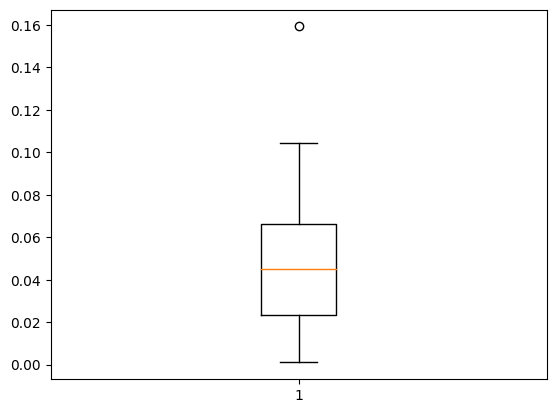

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'colname' is the name of your column

plt.boxplot(df['Parity'])

# Required, to actually display the plot
plt.show()

Dirty Data

In [53]:
dirty_sampled_dfs_train = []
dirty_sampled_dfs_test = []
num_samples = 100
seed_value = 42
for i in range(num_samples):
    sampled_df = dirty_df.sample(n=20, random_state=seed_value + i)
    if(i>num_samples-(num_samples)*0.2):
        dirty_sampled_dfs_test.append(sampled_df)
    else:
        dirty_sampled_dfs_train.append(sampled_df)


In [15]:
dirty_df.head()

,Checking-Account,Duration,Credit-history,Purpose,Credit-amount,Savings-account,Present-employment,Installment-rate,Status/sex,Other-debtors,...,Property,Age,Other-installment,Housing,Existing-credits,Job,liable,Telephone,Foreign-worker,target
0,1,6,5,4,1,5,5,4,3,1,...,1,2,3,2,2,3,1,2,1,1
1,2,48,3,4,4,1,3,2,2,1,...,1,1,3,2,1,3,1,1,1,2
2,4,12,5,7,2,1,4,2,3,1,...,1,2,3,2,1,2,2,1,1,1
3,1,42,3,3,4,1,4,2,3,3,...,2,2,3,3,1,3,2,1,1,1
4,1,24,4,1,4,1,3,3,3,1,...,4,2,3,3,2,3,2,1,1,2


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
def cal_chisquare(sampled_dfs):
  chi_squared_results = []
  for sample_df in sampled_dfs:
    contingency_table = pd.crosstab(sample_df['target'],sample_df['Age'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_squared_results.append(chi2)
  return chi_squared_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(chi_squared_results),len(age_above_thres),len(age_percentage),len(age_below_thes),len(prop_above_thres),len(prop_below_thes),len(parity),len(confidence_values),len(support_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(50, 50, 50, 50, 50, 50, 50, 50, 50)

In [ ]:
data = list(zip(chi_squared_results,prop_below_thes,age_percentage,confidence_values,support_values,parity))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Chi-Square,Prop_Below_Thresh,Age_Percent,Confidence Value,Support Value,Parity
0,1.528840,0.173333,0.45,0.768000,96,0.055718
1,5.488580,0.153333,0.75,0.744000,93,0.153340
2,6.220391,0.173333,0.60,0.773050,109,0.122295
3,0.000149,0.133333,0.50,0.710938,91,0.094591
4,4.141948,0.120000,0.55,0.803279,98,0.181383


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,f1_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
# Assuming your data is in a DataFrame named 'df'

# Extract features (independent variables) and target (dependent variable)
features = df.drop('Parity',axis=1)
target = df['Parity']
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

# Create and train the linear regression model


model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(model.coef_)
# Display results
print(f"Mean Absolute Error: {mae}")



[ 0.07493341  0.00061203 -0.00991892  0.00311136  0.00986575]
Mean Absolute Error: 0.04677406253370192


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


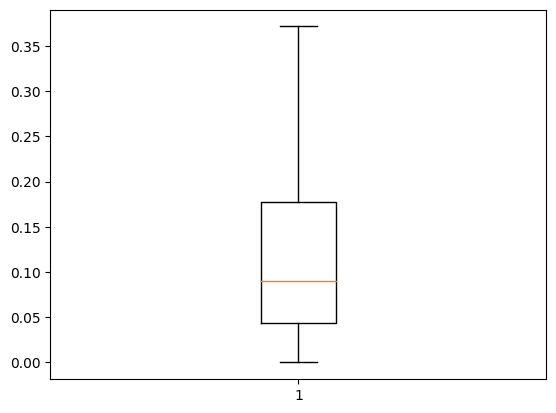

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'colname' is the name of your column

plt.boxplot(df['Parity'])

# Required, to actually display the plot
plt.show()

In [46]:
len(dirty_sampled_dfs_train),dirty_sampled_dfs_train[0].shape,dirty_sampled_dfs_test[0].shape,len(dirty_sampled_dfs_test)

(81, (20, 21), (20, 21), 19)

In [56]:
metafeatures_df_train = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_train,categorical_cols= ['Checking-Account','Credit-history', 'Purpose',
            'Credit-amount', 'Savings-account', 'Present-employment',
            'Installment-rate', 'Status/sex', 'Other-debtors', 'Present-residence',
            'Property', 'Age', 'Other-installment', 'Housing', 'Existing-credits',
            'Job', 'liable', 'Telephone', 'Foreign-worker'],numeric_columns= ['Duration'],sensitive_attr='Age',target_attr='target')
metafeatures_df_test = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_test,categorical_cols= ['Checking-Account','Credit-history', 'Purpose',
            'Credit-amount', 'Savings-account', 'Present-employment',
            'Installment-rate', 'Status/sex', 'Other-debtors', 'Present-residence',
            'Property', 'Age', 'Other-installment', 'Housing', 'Existing-credits',
            'Job', 'liable', 'Telephone', 'Foreign-worker'],numeric_columns= ['Duration'],sensitive_attr='Age',target_attr='target')

0.8838275260520497
0.8807116163013124
----------------------------------------
0.9554343836186919
0.6481571844631978
----------------------------------------
0.9649257272767238
0.98805113609148
----------------------------------------
nan
0.4648374128937192
----------------------------------------
0.022919755174681478
0.6700846963485411
----------------------------------------
0.808308163288716
0.8421538439538709
----------------------------------------
0.8636949779705057
0.5737377083926337
----------------------------------------
nan
0.6186044269286877
----------------------------------------
0.9578081066302027
0.5379408521875554
----------------------------------------
0.8686367042025549
0.7791917236776501
----------------------------------------
nan
0.4872703475889437
----------------------------------------
0.6094290038125282
0.5742106269185807
----------------------------------------
nan
0.9845957159950871
----------------------------------------
nan
0.9988181636546564
-----------

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train = metafeatures_df_train.drop('target', axis=1)
y_train = metafeatures_df_train['target']
X_test = metafeatures_df_test.drop('target', axis=1)
y_test = metafeatures_df_test['target']

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Optionally: Displaying the coefficients of the model
print(f'Coefficients: {model.coef_}')


Mean Squared Error: 0.036199240558481144
Coefficients: [ 0.00000000e+00 -3.68628739e-17  3.46944695e-17 -3.46944695e-17
  4.85722573e-17 -1.51093423e-02 -7.80237264e-03  2.77555756e-17
 -1.22909193e-02 -1.46166620e-02  4.23550590e-01  2.95391265e-02
  1.97793121e-02]


In [14]:
metafeatures_df_train.columns

Index(['num_instances', 'num_features', 'num_missing_values',
       'num_numeric_features', 'num_categorical_features', 'mean_skewness',
       'mean_kurtosis', 'pca_components_95_var', 'min_categories',
       'max_categories', 'mean_categories', 'mean_entropy', 'correlation',
       'target'],
      dtype='object')

In [17]:
for i in range(len(model.coef_)):
    print(metafeatures_df_train.columns[i],"   ",model.coef_[i])

num_instances     0.0
num_features     -3.686287386450715e-17
num_missing_values     3.469446951953614e-17
num_numeric_features     -3.469446951953614e-17
num_categorical_features     4.85722573273506e-17
mean_skewness     -0.015109342306808304
mean_kurtosis     -0.007802372641153797
pca_components_95_var     2.7755575615628914e-17
min_categories     -0.012290919273073504
max_categories     -0.014616662008461949
mean_categories     0.4235505899633468
mean_entropy     0.029539126514751088
correlation     0.019779312112538392


In [20]:
y_test

0     0.346062
1     0.242172
2     0.242172
3     0.242172
4     0.242172
5     0.242172
6     0.242172
7     0.242172
8     0.795602
9     0.072050
10    0.004242
11    0.117427
12    0.242172
13    0.527932
14    0.024486
15    0.242172
16    0.242172
17    0.242172
18    0.049573
Name: target, dtype: float64

In [19]:
predictions

array([0.3505632 , 0.21746798, 0.2092111 , 0.31672878, 0.27991084,
       0.20265649, 0.21064039, 0.17678536, 0.26109597, 0.34449525,
       0.32483655, 0.31136087, 0.35127237, 0.2936013 , 0.22299048,
       0.3324366 , 0.24002277, 0.24018554, 0.28950199])

In [21]:
metafeatures_df_test.shape

(19, 14)

<h1> ACS Income Dataset </h1>

In [2]:
from folktables import ACSDataSource, ACSIncome
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')

In [2]:

ca_data = data_source.get_data(states=["CA"], download=True)
mi_data = data_source.get_data(states=["MI"], download=True)
ca_features, ca_labels, group = ACSIncome.df_to_numpy(ca_data)

       RT       SERIALNO  DIVISION  SPORDER  PUMA  REGION  ST   ADJINC  PWGTP  \
0       P  2018GQ0000004         9        1  3701       4   6  1013097     32   
1       P  2018GQ0000013         9        1  7306       4   6  1013097     45   
2       P  2018GQ0000016         9        1  3755       4   6  1013097    109   
3       P  2018GQ0000020         9        1  7319       4   6  1013097     34   
4       P  2018GQ0000027         9        1  6511       4   6  1013097     46   
...    ..            ...       ...      ...   ...     ...  ..      ...    ...   
378812  P  2018HU1400891         9        2  1308       4   6  1013097     94   
378813  P  2018HU1400893         9        1  7108       4   6  1013097    172   
378814  P  2018HU1400893         9        2  7108       4   6  1013097    156   
378815  P  2018HU1400893         9        3  7108       4   6  1013097    172   
378816  P  2018HU1400893         9        4  7108       4   6  1013097    127   

        AGEP  ...  PWGTP71 

<h1> Data Exploration </h1>

Target is <b> PINCP  (Total person’s income): an individual’s label is 1 if PINCP > 50000, otherwise 0 

<h3> Features </h3>

AGEP (Age): Range of values:

COW (Class of worker): Range of values:

SCHL (Educational attainment): Range of values

MAR (Marital status): Range of values

OCCP (Occupation)

POBP (Place of birth):

RELP (Relationship): Range of values:

WKHP (Usual hours worked per week past 12 months): Range of values:

SEX (Sex): Range of values:

RAC1P (Recoded detailed race code):


In [3]:
cols = ['AGEP',
        'COW',
        'SCHL',
        'MAR',
        'OCCP',
        'POBP',
        'RELP',
        'WKHP',
        'SEX',
        'RAC1P']

len(cols)

10

In [15]:
import pandas as pd
df = pd.DataFrame(data=ca_features,columns=cols)
df['PINCP'] = ca_labels

NameError: name 'ca_features' is not defined

In [7]:
df.shape
df.to_csv("ACSIncome.csv",index=False)

In [4]:
import pandas as pd
df = pd.read_csv("ACSIncome.csv")

In [163]:
df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0,False
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0,False
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0,False
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0,False
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0,False


In [164]:
for c in df.columns:
    print(df[c].value_counts())
    print("------------------")

AGEP
28.0    4454
30.0    4425
35.0    4401
29.0    4267
32.0    4258
        ... 
94.0      52
87.0      51
88.0      29
89.0      20
90.0      14
Name: count, Length: 75, dtype: int64
------------------
COW
1.0    127815
6.0     16669
3.0     15765
2.0     13814
4.0      8300
7.0      7678
5.0      5056
8.0       568
Name: count, dtype: int64
------------------
SCHL
21.0    46526
16.0    32897
19.0    32361
22.0    19593
20.0    15703
18.0    12964
23.0     5635
15.0     4559
17.0     4150
24.0     3895
1.0      3448
9.0      3259
14.0     3138
12.0     2234
13.0     1640
11.0     1206
6.0       588
8.0       521
10.0      467
7.0       391
5.0       266
4.0       107
2.0        59
3.0        58
Name: count, dtype: int64
------------------
MAR
1.0    102442
5.0     68408
3.0     17794
4.0      3728
2.0      3293
Name: count, dtype: int64
------------------
OCCP
440.0     5513
4760.0    4289
2310.0    4208
4720.0    4201
9130.0    3948
          ... 
510.0        3
6210.0       3
8850

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df.drop('PINCP',axis=1))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [6]:
scaled_df['PINCP'] = df['PINCP']
scaled_df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,-0.855577,2.042523,-1.133890,-0.895994,2.119473,-0.715714,3.034549,0.163863,-0.945485,1.690047,False
1,-1.460230,0.983100,-0.626592,1.270411,-0.777569,-0.715714,3.259504,-1.372352,-0.945485,-0.710917,False
2,1.495849,-0.076322,0.895303,1.270411,-0.751025,-0.715714,3.259504,-2.294081,-0.945485,-0.710917,False
3,-0.654027,-0.606034,-1.133890,0.187208,2.119473,-0.472813,3.034549,0.163863,-0.945485,-0.710917,False
4,-1.661781,-0.076322,0.134356,1.270411,-1.137424,-0.715714,3.259504,-1.525973,1.057658,-0.710917,False


In [167]:
dirty_sampled_dfs_train = []
dirty_sampled_dfs_test = []
num_samples = 1000
seed_value = 42
for i in range(num_samples):
    sampled_df = df.sample(n=300, random_state=seed_value + i)
    if(i>num_samples-(num_samples)*0.2):
        dirty_sampled_dfs_test.append(sampled_df)
    else:
        dirty_sampled_dfs_train.append(sampled_df)

In [168]:
numeric_cols = ['AGEP','OCCP','POBP','WKHP']
categorical_cols = ['COW','SCHL','MAR','RELP','SEX','RAC1P' ]

In [169]:
import german_helper
importlib.reload(german_helper)

metafeatures_df_train = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_train,categorical_cols=categorical_cols,numeric_columns=numeric_cols,target_attr='PINCP',sensitive_attr='SEX')
metafeatures_df_test = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_test,categorical_cols=categorical_cols,numeric_columns=numeric_cols,target_attr='PINCP',sensitive_attr='SEX')

c:\Users\ckevi\anaconda3\envs\research\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ckevi\anaconda3\envs\research\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [170]:
metafeatures_df_train.columns,metafeatures_df_train.shape

(Index(['mean_skewness', 'mean_kurtosis', 'pca_components_95_var',
        'max_categories', 'mean_categories', 'mean_entropy', 'correlation',
        'confidence', 'support', 'value_below_thres', 'prop_below_thres',
        'target'],
       dtype='object'),
 (801, 12))

In [171]:
metafeatures_df_train.head()

,mean_skewness,mean_kurtosis,pca_components_95_var,max_categories,mean_categories,mean_entropy,correlation,confidence,support,value_below_thres,prop_below_thres,target
0,0.372246,-0.076459,4,20,9.666667,1.366632,9.781174,0.717241,104.0,0.591492,0.516667,0.091719
1,0.244268,-0.251859,4,18,9.333333,1.353294,10.016212,0.692857,97.0,0.558648,0.533333,0.144003
2,0.340811,0.109539,4,19,9.666667,1.385773,4.288617,0.651316,99.0,0.495286,0.493333,0.198730
3,0.367062,-0.030780,4,18,8.500000,1.352260,0.032234,0.623222,93.5,0.571902,0.493333,0.040342
4,0.251947,-0.038134,4,17,9.166667,1.384963,3.912112,0.673469,99.0,0.539232,0.510000,0.168297


In [32]:
# concatenated_df = pd.concat([metafeatures_df_train, metafeatures_df_test])
# concatenated_df.to_csv('MetaFeatures_CA.csv', index=False) 

metafeatures_df = pd.read_csv("MetaFeatures_CA.csv")

metafeatures_df.shape


(1000, 12)

In [33]:
metafeatures_df_train = metafeatures_df.head(800)
metafeatures_df_test = metafeatures_df.tail(200)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train = metafeatures_df_train.drop('target', axis=1)
y_train = metafeatures_df_train['target']
X_test = metafeatures_df_test.drop('target', axis=1)
y_test = metafeatures_df_test['target']

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Optionally: Displaying the coefficients of the model
print(f'Coefficients: {model.coef_}')

#Last MSE 0.006413031451814457

Mean Squared Error: 0.0027410122881691605
Coefficients: [-4.43561512e-02 -4.08688753e-03 -1.46150453e-16 -1.78367538e-03
  3.26310732e-03  1.90196162e-01  4.41302775e-03  6.81757519e-02
 -1.30953269e-04 -8.70829302e-01  2.61497735e-01]


In [35]:
import numpy as np
index = 0
for elem in np.nditer(model.coef_):
    print(metafeatures_df_train.columns[index], elem)
    index+=1

mean_skewness -0.04435615115434627
mean_kurtosis -0.004086887532249297
pca_components_95_var -1.46150452851046e-16
max_categories -0.0017836753765006466
mean_categories 0.003263107323839776
mean_entropy 0.1901961617012102
correlation 0.004413027753158973
confidence 0.06817575187368169
support -0.0001309532692426573
value_below_thres -0.870829301589412
prop_below_thres 0.2614977350620857


In [42]:
# len(predictions),len(y_test)
# type(y_test),type(predictions)
# y_test = y_test.to_numpy()
for i in range(30):
    if(abs(y_test[i]-predictions[i])>0.1):
        print(i,y_test[i],predictions[i])

3 0.0861217332848864 0.18731090554689048
7 0.3862093552890072 0.2498529108964991
14 0.4153552561048376 0.26363170580307344
20 0.2536756135199675 0.13448835523879543


In [43]:
# len(predictions),len(y_test)
# type(y_test),type(predictions)
# y_test = y_test.to_numpy()
for i in range(30):
    if(abs(y_test[i]-predictions[i])<0.01):
        print(i,y_test[i],predictions[i])

2 0.3530469912992526 0.3511185353310976
11 0.2358057599390406 0.23236978166206346
22 0.1413578754432206 0.14128239430797337
27 0.0493231017357129 0.04253375098761522
29 0.2140553773985534 0.2198117510895688


In [52]:
# Assuming you want to access the row at the 5th position (indexing starts at 0)
row = metafeatures_df_test.iloc[11]  # This fetches the 5th row
row

mean_skewness             0.393777
mean_kurtosis             0.094678
pca_components_95_var     4.000000
max_categories           17.000000
mean_categories           9.000000
mean_entropy              1.374863
correlation               1.309697
confidence                0.552326
support                  95.000000
value_below_thres         0.431193
prop_below_thres          0.573333
target                    0.235806
Name: 811, dtype: float64

In [51]:
# Assuming you want to access the row at the 5th position (indexing starts at 0)
row = metafeatures_df_test.iloc[20]  # This fetches the 5th row
row

mean_skewness             0.410908
mean_kurtosis             0.178381
pca_components_95_var     4.000000
max_categories           18.000000
mean_categories           9.333333
mean_entropy              1.352466
correlation               3.146140
confidence                0.000000
support                   0.000000
value_below_thres         0.506979
prop_below_thres          0.540000
target                    0.253676
Name: 820, dtype: float64

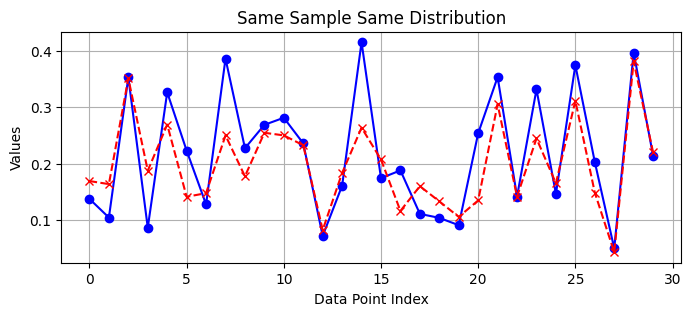

In [48]:
# Creating a line chart for original vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))

# Plotting both the actual and predicted values
plt.plot(y_test[0:30], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(predictions[0:30], label='Predicted Values', marker='x', linestyle='--', color='red')

plt.title('Same Sample Same Distribution')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
# plt.legend()
plt.grid(True)
plt.show()


In [10]:
import german_helper
importlib.reload(german_helper)

intervals = [0.01,0.02,0.05,0.1,0.15,0.2]
margins_same_distrn= []
for interval in intervals:
    margins_same_distrn.append(german_helper.calculate_margins(y_test,predictions,interval))





18.5
34.5
65.0
94.0
99.5
100.0


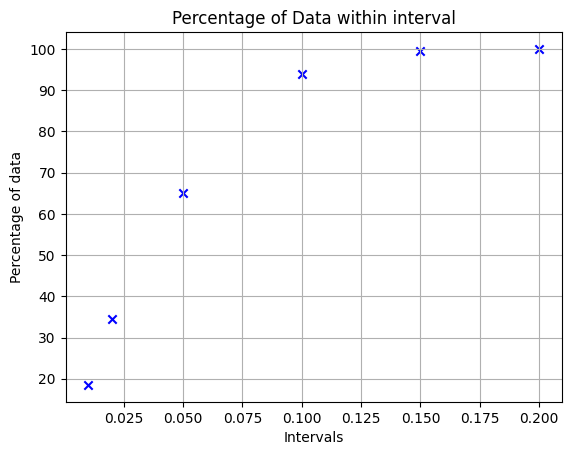

In [11]:
import matplotlib.pyplot as plt


# Create a basic scatter plot
plt.scatter(intervals, margins_same_distrn, color='b', marker='x', label='Data Points')

# Customize the plot
plt.xlabel('Intervals')
plt.ylabel('Percentage of data')
plt.title('Percentage of Data within interval')
plt.grid(True)


# Show the plot
plt.show()

In [186]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "acs_income_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)


In [7]:
import pickle
model_pkl_file = "acs_income_model.pkl"  
# Load the saved model from the pickle file
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

# Now 'loaded_model' contains the loaded model


In [188]:
mi_data = data_source.get_data(states=["MI"], download=True)
mi_features, mi_labels, group_mi = ACSIncome.df_to_numpy(mi_data)

      RT       SERIALNO  DIVISION  SPORDER  PUMA  REGION  ST   ADJINC  PWGTP  \
0      P  2018GQ0000064         3        1  2907       2  26  1013097      8   
1      P  2018GQ0000154         3        1  1200       2  26  1013097     92   
2      P  2018GQ0000158         3        1  2903       2  26  1013097     26   
3      P  2018GQ0000174         3        1  1801       2  26  1013097     86   
4      P  2018GQ0000212         3        1  2600       2  26  1013097     99   
...   ..            ...       ...      ...   ...     ...  ..      ...    ...   
99414  P  2018HU1400874         3        4  2102       2  26  1013097     90   
99415  P  2018HU1400897         3        1   300       2  26  1013097     77   
99416  P  2018HU1400897         3        2   300       2  26  1013097     75   
99417  P  2018HU1400897         3        3   300       2  26  1013097     72   
99418  P  2018HU1400897         3        4   300       2  26  1013097     90   

       AGEP  ...  PWGTP71  PWGTP72  PWG

In [189]:
import pandas as pd
mi_df = pd.DataFrame(data=mi_features,columns=cols)
mi_df['PINCP'] = mi_labels

In [190]:
dirty_sampled_dfs_test = []
num_samples = 300
seed_value = 42
for i in range(num_samples):
    sampled_df = mi_df.sample(n=300, random_state=seed_value + i)
    dirty_sampled_dfs_test.append(sampled_df)

In [ ]:
import german_helper
metafeatures_df_test = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_test,categorical_cols=categorical_cols,numeric_columns=numeric_cols,target_attr='PINCP',sensitive_attr='SEX')

In [192]:
metafeatures_df_test.to_csv("MetaFeatures_MI.csv",index=False)


<h1> MI InSample Different Distribution Testing <h1>

In [13]:

metafeatures_df = pd.read_csv("MetaFeatures_MI.csv")
metafeatures_df_train = metafeatures_df.head(800)
metafeatures_df_test = metafeatures_df.tail(200)

In [14]:
X_test = metafeatures_df_test.drop('target', axis=1)
y_test = metafeatures_df_test['target']


# Making predictions on the testing set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Optionally: Displaying the coefficients of the model
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 0.019083452682403905
Coefficients: [-4.50811547e-02 -4.15875646e-03  2.30718222e-16 -1.73220743e-03
  3.13337477e-03  1.90004422e-01  4.41885969e-03  6.80367321e-02
 -1.30716555e-04 -8.70529558e-01  2.62373381e-01]


In [15]:
import numpy as np
index = 0
for elem in np.nditer(model.coef_):
    print(metafeatures_df_train.columns[index], elem)
    index+=1

mean_skewness -0.04508115470991726
mean_kurtosis -0.00415875645690697
pca_components_95_var 2.3071822230491534e-16
max_categories -0.0017322074288449018
mean_categories 0.0031333747680019073
mean_entropy 0.1900044218674536
correlation 0.004418859688113557
confidence 0.06803673205297091
support -0.0001307165553849311
value_below_thres -0.8705295576551101
prop_below_thres 0.26237338145876754


In [18]:
y_test = y_test.to_numpy()
for i in range(30):
    print(predictions[i],y_test[i])

-0.01963986755393457 0.1571727868020749
0.012209997076460116 0.1743336665059809
0.031320659560647696 0.1705819008955874
-0.03633295766885211 0.0066700071310346
-0.027308453183525816 0.1632791718299973
0.020119278925771172 0.1124336703604542
0.10638840239927777 0.2943534927057885
-0.0011483211218365763 0.0618587786643283
-0.01832799678918784 0.0888090904092933
-0.0011298871952651612 0.1491203366310035
0.09291630985342869 0.1920502172788838
0.12610083197853464 0.2738387144937366
-0.02276706352317237 0.1559867856352349
-0.03320953998813431 0.1635346156555874
0.0904877417877667 0.2716291436631356
0.09892309999534318 0.2681660413835957
-0.05265330852550951 0.11902836791408
0.09179729471732576 0.3095457752563985
0.07960415237684193 0.2500296302440901
0.08922715544828186 0.2068419438630737
0.005583531792576257 0.1756020182261202
0.16833996632757342 0.341440660779323
0.14701228246807302 0.2778793026544934
0.12386922077043352 0.185688193108772
0.08888198755217055 0.2067846039029658
0.1246775451

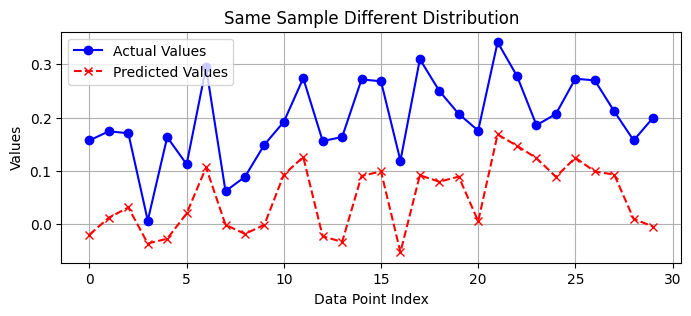

In [19]:
# Creating a line chart for original vs predicted values

plt.figure(figsize=(8, 3))

# Plotting both the actual and predicted values
plt.plot(y_test[0:30], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(predictions[0:30], label='Predicted Values', marker='x', linestyle='--', color='red')

plt.title('Same Sample Different Distribution')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
german_helper.calculate_margins(y_test,predictions,0.10)

23.0


23.0

0.5
1.0
4.5
23.0
67.5
95.5


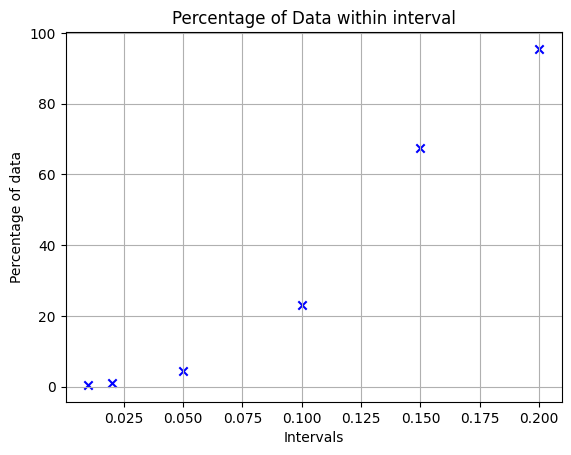

In [21]:
import german_helper
importlib.reload(german_helper)

intervals = [0.01,0.02,0.05,0.1,0.15,0.2]
margins_diff_distrn= []
for interval in intervals:
    margins_diff_distrn.append(german_helper.calculate_margins(y_test,predictions,interval))


import matplotlib.pyplot as plt


# Create a basic scatter plot
plt.scatter(intervals, margins_diff_distrn, color='b', marker='x', label='Data Points')

# Customize the plot
plt.xlabel('Intervals')
plt.ylabel('Percentage of data')
plt.title('Percentage of Data within interval')
plt.grid(True)


# Show the plot
plt.show()


<h1> German Out of Sample Testing</h1>

In [70]:
import pandas as pd
german_df = pd.read_csv("Preprocessed_German.csv")
dirty_sampled_dfs_train = []
dirty_sampled_dfs_test = []
num_samples = 70
seed_value = 42
for i in range(num_samples):
    if(i<2):
        sampled_df = german_df.sample(n=100, random_state=seed_value + i)
        dirty_sampled_dfs_train.append(sampled_df)
    else:
        sampled_df = german_df.sample(n=100, random_state=seed_value + i)
        dirty_sampled_dfs_test.append(sampled_df)
        
categorical_cols = ['Checking-Account','Credit-history', 'Purpose',
            'Credit-amount', 'Savings-account', 'Present-employment',
            'Installment-rate', 'Status/sex', 'Other-debtors', 'Present-residence',
            'Property', 'Age', 'Other-installment', 'Housing', 'Existing-credits',
            'Job', 'liable', 'Telephone', 'Foreign-worker']
numeric_cols = ['Duration']



In [71]:

len(dirty_sampled_dfs_test),len(dirty_sampled_dfs_train)

(68, 2)

In [72]:
import german_helper
importlib.reload(german_helper)

metafeatures_df_train = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_train,categorical_cols=categorical_cols,numeric_columns=numeric_cols,target_attr='target',sensitive_attr='Age',isGerman = True)


In [73]:
metafeatures_df_test = german_helper.createMetaFeaturesDataframe(dirty_sampled_dfs_test,categorical_cols=categorical_cols,numeric_columns=numeric_cols,target_attr='target',sensitive_attr='Age',isGerman = True)


In [74]:
metafeatures_df_test.dropna(subset=['target'], inplace=True)
metafeatures_df_test.shape

(63, 12)

In [75]:
X_train = metafeatures_df_train.drop('target', axis=1)
y_train = metafeatures_df_train['target']
model.fit(X_train, y_train)

LinearRegression()

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_test = metafeatures_df_test.drop('target', axis=1)
y_test = metafeatures_df_test['target']


# Making predictions on the testing set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Optionally: Displaying the coefficients of the model
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 0.034178302327292666
Coefficients: [ 0.01619892  0.03745338  0.          0.05615327  0.00422089 -0.00060508
 -0.07918616  0.00155429  0.00282459 -0.00354586  0.00232781]


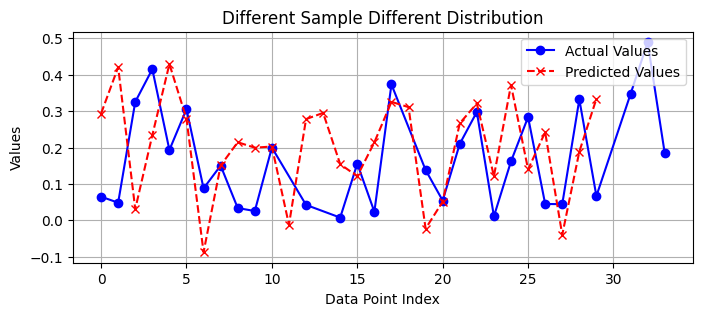

In [77]:
plt.figure(figsize=(8, 3))

# Plotting both the actual and predicted values
plt.plot(y_test[0:30], label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(predictions[0:30], label='Predicted Values', marker='x', linestyle='--', color='red')

plt.title('Different Sample Different Distribution')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
german_helper.calculate_margins(y_test,predictions,0.10)

28.57142857142857


28.57142857142857

In [28]:
X_train = metafeatures_df_train.drop('target', axis=1)
y_train = metafeatures_df_train['target']
model.fit(X_train, y_train)

0     0.287783
1     0.157041
2     0.139702
3     0.472021
4     0.119969
6     0.080550
8     0.054889
9     0.012062
14    0.213681
16    0.275280
17    0.521199
19    0.119757
21    0.147974
22    0.566239
23    0.130102
25    0.125354
26    0.295183
27    0.048651
28    0.190678
29    0.237877
Name: target, dtype: float64

In [29]:
predictions[0:20]


array([ 0.03893767, -0.12424448, -0.35395398, -0.36446529, -0.26021327,
       -0.48752058, -0.23815696, -0.32826578, -0.22342274, -0.36357508,
        0.28354828, -0.04066752, -0.22592421,  0.16159879, -0.02450915,
       -0.38441351, -0.46590592, -0.47238068, -0.17716997, -0.36821627])

0.0
0.0
0.4329004329004329
2.1645021645021645
6.926406926406926
12.554112554112553


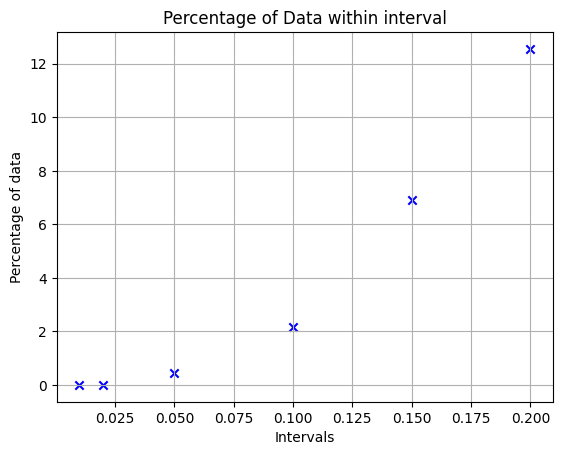

In [30]:
import german_helper
importlib.reload(german_helper)

intervals = [0.01,0.02,0.05,0.1,0.15,0.2]
margins_diff_sample= []
for interval in intervals:
    margins_diff_sample.append(german_helper.calculate_margins(y_test,predictions,interval))


import matplotlib.pyplot as plt


# Create a basic scatter plot
plt.scatter(intervals, margins_diff_sample, color='b', marker='x', label='Data Points')

# Customize the plot
plt.xlabel('Intervals')
plt.ylabel('Percentage of data')
plt.title('Percentage of Data within interval')
plt.grid(True)


# Show the plot
plt.show()


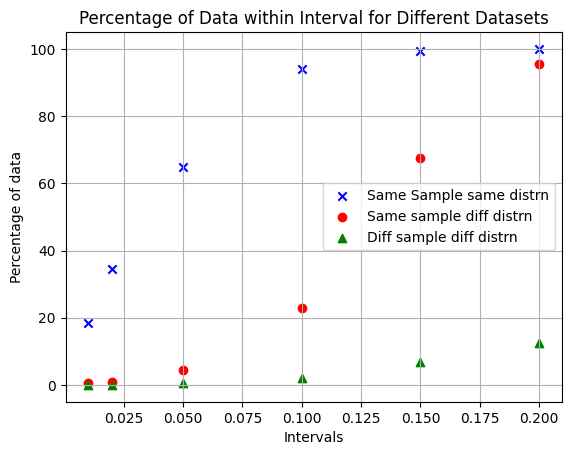

In [31]:
import matplotlib.pyplot as plt



# Create multiple scatter plots on the same figure
plt.scatter(intervals, margins_same_distrn, color='b', marker='x', label='Same Sample same distrn')
plt.scatter(intervals, margins_diff_distrn, color='r', marker='o', label='Same sample diff distrn')
plt.scatter(intervals, margins_diff_sample, color='g', marker='^', label='Diff sample diff distrn')

# Customize the plot
plt.xlabel('Intervals')
plt.ylabel('Percentage of data')
plt.title('Percentage of Data within Interval for Different Datasets')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


<h1>Adult Dataset</h1>

In [ ]:
sampled_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Month', 'Credit-amount', 'Investment-as-income-percentage',
       'Present-residence', 'Age', 'Number-of-credits', 'People-liable-for',
       'Sex', 'Status', 'Housing', 'Skill-level', 'Telephone',
       'Foreign-worker', 'Other-installment', 'Other-debtors',
       'Credit-history', 'Purpose', 'Savings-account', 'Present-employment',
       'Property', 'target'],
      dtype='object')

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Chi-Square', 'Prop_Below_Thresh', 'Age_Percent', 'Confidence Value',
       'Support Value', 'Parity'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]
adult_df = pd.read_csv('adult.data', sep=',', header=None,index_col=0)
adult_df.to_csv('my_file.csv',header=None)
adult_df = pd.read_csv('my_file.csv',names=features)
adult_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'adult.data'

In [ ]:
adult_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'adult_df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = ["Workclass", "Education", "Martial Status", "Occupation",
                    "Relationship", "Race", "Sex", "Country"]
for col in categorical_cols:
    adult_df[col] = label_encoder.fit_transform(adult_df[col])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ["Age", "fnlwgt", "Education-Num", "Capital Gain", "Capital Loss", "Hours per week"]

# Apply standard scaling to numerical columns
adult_df[numerical_cols] = scaler.fit_transform(adult_df[numerical_cols])


In [ ]:
adult_df['Target'] = np.where(adult_df['Target'] ==' <=50K', 1, 2)


In [ ]:
for i in range(1,7):
  X = df.drop('Target', axis=1)
  y = df['Target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  y_pred_prob = knn.predict_proba(X_test)

  first_values = [row[0] for row in y_pred_prob]
  second_values = [row[1] for row in y_pred_prob]
  X_test['prob_1'] = first_values
  X_test['prob_2'] = second_values
  # Male
  age_below_thes= X_test.loc[X_test['Sex'] == 1 , 'prob_1'].mean()

  print(age_below_thes)

  age_above_thres= X_test.loc[X_test['Sex'] == 0, 'prob_1'].mean()

  print(age_above_thres)
  print("----------------------------------------")

In [ ]:
  X = df.drop('Target', axis=1)
  y = df['Target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  y_pred_prob = logreg.predict_proba(X_test)

  first_values = [row[0] for row in y_pred_prob]
  second_values = [row[1] for row in y_pred_prob]
  X_test['prob_1'] = first_values
  X_test['prob_2'] = second_values
  # Male
  age_below_thes= X_test.loc[X_test['Sex'] == 1 , 'prob_1'].mean()

  print(age_below_thes)

  age_above_thres= X_test.loc[X_test['Sex'] == 0, 'prob_1'].mean()

  print(age_above_thres)
  print("----------------------------------------")

EQUALIZED ODDS GERMAN

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [ ]:
df['Age'] = np.where(df['Age'] < 45, 1, 2)

In [ ]:
df.head(1)

,Checking-Account,Duration,Credit-history,Purpose,Credit-amount,Savings-account,Present-employment,Installment-rate,Status/sex,Other-debtors,Present-residence,Property,Age,Other-installment,Housing,Existing-credits,Job,liable,Telephone,Foreign-worker,target
0,1,6,5,4,1169,5,5,4,3,1,4,1,2,3,2,2,3,1,2,1,1


In [ ]:
# Assuming 'Age' is the sensitive attribute column in the DataFrame 'df'
X = df.drop('target', axis=1)
y = df['target']
sensitive_attribute = df['Age']  # Replace 'Age' with the actual column name of the sensitive attribute

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(
    X, y, sensitive_attribute, test_size=0.2, random_state=42
)

# Train the classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

# Calculate Equalized Odds
y_test_0 = y_test[X_test['Age'] == 1]
y_pred_0 = y_pred[X_test['Age'] == 1]
confusion_matrix_0 = confusion_matrix(y_test_0, y_pred_0)

y_test_1 = y_test[X_test['Age'] == 2]
y_pred_1 = y_pred[X_test['Age'] == 2]
confusion_matrix_1 = confusion_matrix(y_test_1, y_pred_1)

fpr_0 = confusion_matrix_0[0, 1] / (confusion_matrix_0[0, 1] + confusion_matrix_0[0, 0])   # FP / FP+TN
fnr_0 = confusion_matrix_0[1, 0] / (confusion_matrix_0[1, 1] + confusion_matrix_0[1, 0])   # FN / TP+FP

fpr_1 = confusion_matrix_1[0, 1] / (confusion_matrix_1[0, 1] + confusion_matrix_1[0, 0])
fnr_1 = confusion_matrix_1[1, 0] / (confusion_matrix_1[1, 1] + confusion_matrix_1[1, 0])

fpr_diff = abs(fpr_0 - fpr_1)
fnr_diff = abs(fnr_0 - fnr_1)

equalized_odds = (fpr_diff + fnr_diff) / 2


In [ ]:
equalized_odds,fpr_diff,fnr_diff

(0.06964285714285717, 0.125, 0.014285714285714346)

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

In [ ]:
y_test_0 = y_test[X_test['Sex'] == 0]
y_pred_0 = y_pred[X_test['Sex'] == 0]
confusion_matrix_0 = confusion_matrix(y_test_0, y_pred_0)

y_test_1 = y_test[X_test['Sex'] == 1]
y_pred_1 = y_pred[X_test['Sex'] == 1]
confusion_matrix_1 = confusion_matrix(y_test_1, y_pred_1)

fpr_0 = confusion_matrix_0[0, 1] / (confusion_matrix_0[0, 1] + confusion_matrix_0[0, 0])   # FP / FP+TN
fnr_0 = confusion_matrix_0[1, 0] / (confusion_matrix_0[1, 1] + confusion_matrix_0[1, 0])   # FN / TP+FP

fpr_1 = confusion_matrix_1[0, 1] / (confusion_matrix_1[0, 1] + confusion_matrix_1[0, 0])
fnr_1 = confusion_matrix_1[1, 0] / (confusion_matrix_1[1, 1] + confusion_matrix_1[1, 0])

fpr_diff = abs(fpr_0 - fpr_1)
fnr_diff = abs(fnr_0 - fnr_1)

equalized_odds = (fpr_diff + fnr_diff) / 2

In [ ]:
equalized_odds,fpr_diff,fnr_diff

(0.11345988286081944, 0.10000559621619551, 0.12691416950544337)

In [ ]:
from scipy.stats import wasserstein_distance

In [ ]:
distance = wasserstein_distance(df.values.ravel(), adult_df.values.ravel())

print("Wasserstein distance between Adult and German datasets:", distance)

Wasserstein distance between Adult and German datasets: 155.3401997491259


In [ ]:
df.columns,adult_df.columns

(Index(['Checking-Account', 'Duration', 'Credit-history', 'Purpose',
        'Credit-amount', 'Savings-account', 'Present-employment',
        'Installment-rate', 'Status/sex', 'Other-debtors', 'Present-residence',
        'Property', 'Age', 'Other-installment', 'Housing', 'Existing-credits',
        'Job', 'liable', 'Telephone', 'Foreign-worker', 'target'],
       dtype='object'),
 Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
        'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
        'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
       dtype='object'))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: df1 and df2

# Calculate the correlation matrix between df1 and df2
correlation_matrix = pd.concat([df, adult_df], axis=1).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [ ]:
correlation_matrix = pd.concat([df, adult_df], axis=1).corr()
correlation_matrix

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the maximum column width to display full content
pd.set_option('display.max_colwidth', None)

In [ ]:
duplicate_columns = correlation_matrix.columns[correlation_matrix.columns.duplicated()]
correlation_matrix = correlation_matrix.loc[:, ~correlation_matrix.columns.duplicated()]

for column in correlation_matrix.columns:
    sorted_column = correlation_matrix[column].sort_values(ascending=False)

    # Retrieve the second-largest value
    second_largest = sorted_column.iloc[1]
    print(f"Second largest value in column '{column}': {second_largest}")

Second largest value in column 'Checking-Account': 0.22286685996768088
Second largest value in column 'Duration': 0.6249841983009851
Second largest value in column 'Credit-history': 0.43706576967471
Second largest value in column 'Purpose': 0.14749187118904739
Second largest value in column 'Credit-amount': 0.6249841983009851
Second largest value in column 'Savings-account': 0.22286685996768088
Second largest value in column 'Present-employment': 0.24508074505937855
Second largest value in column 'Installment-rate': 0.12616130675235002
Second largest value in column 'Status/sex': 0.12216484500751058
Second largest value in column 'Other-debtors': 0.11799942103780697
Second largest value in column 'Present-residence': 0.24508074505937855
Second largest value in column 'Property': 0.34521863937624375
Second largest value in column 'Age': 0.23559598041304805
Second largest value in column 'Other-installment': 0.12197340167211282
Second largest value in column 'Housing': 0.3452186393762437

In [ ]:
import pandas as pd
features = ["A1","A2","A3","A4","A5","A6","A7",
            "A8","A9","A10","A11","A12","A13","A14","A15","A16"]
credit_df = pd.read_csv('crx.data', sep=',', header=None,names=features)


In [ ]:
credit_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = ["A1", "A4", "A5","A6","A7","A9","A10","A12","A13","A16"]
for col in categorical_cols:
    credit_df[col] = label_encoder.fit_transform(credit_df[col])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ["A2","A3","A8","A11","A14","A15"]
credit_df.replace('?', np.nan, inplace=True)

# Convert numerical columns to float
credit_df[numerical_cols] = credit_df[numerical_cols].astype(float)
# Apply standard scaling to numerical columns
credit_df[numerical_cols] = scaler.fit_transform(credit_df[numerical_cols])

In [ ]:
distance = wasserstein_distance(credit_df.values.ravel(), df.values.ravel())

print("Wasserstein distance between Credit and German datasets:", distance)


Wasserstein distance between Credit and German datasets: 157.52199349727832


In [ ]:
  X = df.drop('target', axis=1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
distance = wasserstein_distance(X_train.values.ravel(), X_test.values.ravel())

print("Wasserstein distance between Train and Test of German datasets:", distance)

Wasserstein distance between Train and Test of German datasets: 6.4883095238097495


In [ ]:
  X = adult_df.drop('Target', axis=1)
  y = adult_df['Target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
distance = wasserstein_distance(X_train.values.ravel(), X_test.values.ravel())

print("Wasserstein distance between Train and Test of Adult datasets:", distance)

Wasserstein distance between Train and Test of Adult datasets: 0.01193523696506496


In [ ]:
from scipy.spatial import distance

distance = distance.jensenshannon(X_train.head(1000).values.ravel(), X_test.head(1000).values.ravel())

print("Jensen distance between Train and Test of Adult datasets:", distance)

Wasserstein distance between Train and Test of Adult datasets: inf


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

def jensen_shannon_divergence(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    epsilon = 1e-8
    p = np.maximum(p, epsilon)
    q = np.maximum(q, epsilon)
    p /= np.sum(p)
    q /= np.sum(q)

    avg_distribution = 0.5 * (p + q)
    jsd = 0.5 * (kl_divergence(p, avg_distribution) + kl_divergence(q, avg_distribution))

    return jsd

def kl_divergence(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)

    if not np.all(p >= 0) or not np.isclose(np.sum(p), 1.0):
        raise ValueError("Invalid input: 'p' must be a valid probability distribution.")
    if not np.all(q >= 0) or not np.isclose(np.sum(q), 1.0):
        raise ValueError("Invalid input: 'q' must be a valid probability distribution.")

    if p.shape != q.shape:
        raise ValueError("Both probability distributions must have the same shape.")

    kl_div = np.sum(np.where(p != 0, p * np.log(p / q), 0))

    return kl_div

dataset1_values = X_train.values
dataset2_values = X_test.values

kde_dataset1 = gaussian_kde(dataset1_values.T)
kde_dataset2 = gaussian_kde(dataset2_values.T)

num_samples = 10000
samples_dataset1 = kde_dataset1.resample(num_samples)
samples_dataset2 = kde_dataset2.resample(num_samples)

p_distribution = np.mean(samples_dataset1, axis=1)
q_distribution = np.mean(samples_dataset2, axis=1)

js_divergence_value = jensen_shannon_divergence(p_distribution, q_distribution)

print("Jensen-Shannon Divergence between the two datasets:", js_divergence_value)

Jensen-Shannon Divergence between the two datasets: 1.6137764472413293e-06


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dataset1_values = X_train.values
dataset2_values = X_test.values

kde_dataset1 = gaussian_kde(dataset1_values.T)
kde_dataset2 = gaussian_kde(dataset2_values.T)

num_samples = 10000
samples_dataset1 = kde_dataset1.resample(num_samples)
samples_dataset2 = kde_dataset2.resample(1000)

p_distribution = np.mean(samples_dataset1, axis=1)
q_distribution = np.mean(samples_dataset2, axis=1)

js_divergence_value = jensen_shannon_divergence(p_distribution, q_distribution)

print("Jensen-Shannon Divergence between the two datasets:", js_divergence_value)

Jensen-Shannon Divergence between the two datasets: 1.2640880286392417e-06


In [ ]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                    Checking-Account  Duration  Credit-history   Purpose  \
Checking-Account            1.000000 -0.072013        0.192191  0.028783   
Duration                   -0.072013  1.000000       -0.077186  0.147492   
Credit-history              0.192191 -0.077186        1.000000 -0.090336   
Purpose                     0.028783  0.147492       -0.090336  1.000000   
Credit-amount              -0.042705  0.624984       -0.059905  0.068474   
Savings-account             0.222867  0.047661        0.039058 -0.018684   
Present-employment          0.106339  0.057381        0.138225  0.016013   
Installment-rate           -0.005280  0.074749        0.044375  0.048369   
Status/sex                  0.043261  0.014789        0.042171  0.000157   
Other-debtors              -0.127737 -0.024490       -0.040676 -0.017607   
Present-residence          -0.042234  0.034067        0.063198 -0.038221   
Property                   -0.032260  0.303971       -0.053777  0.010966   
Age         

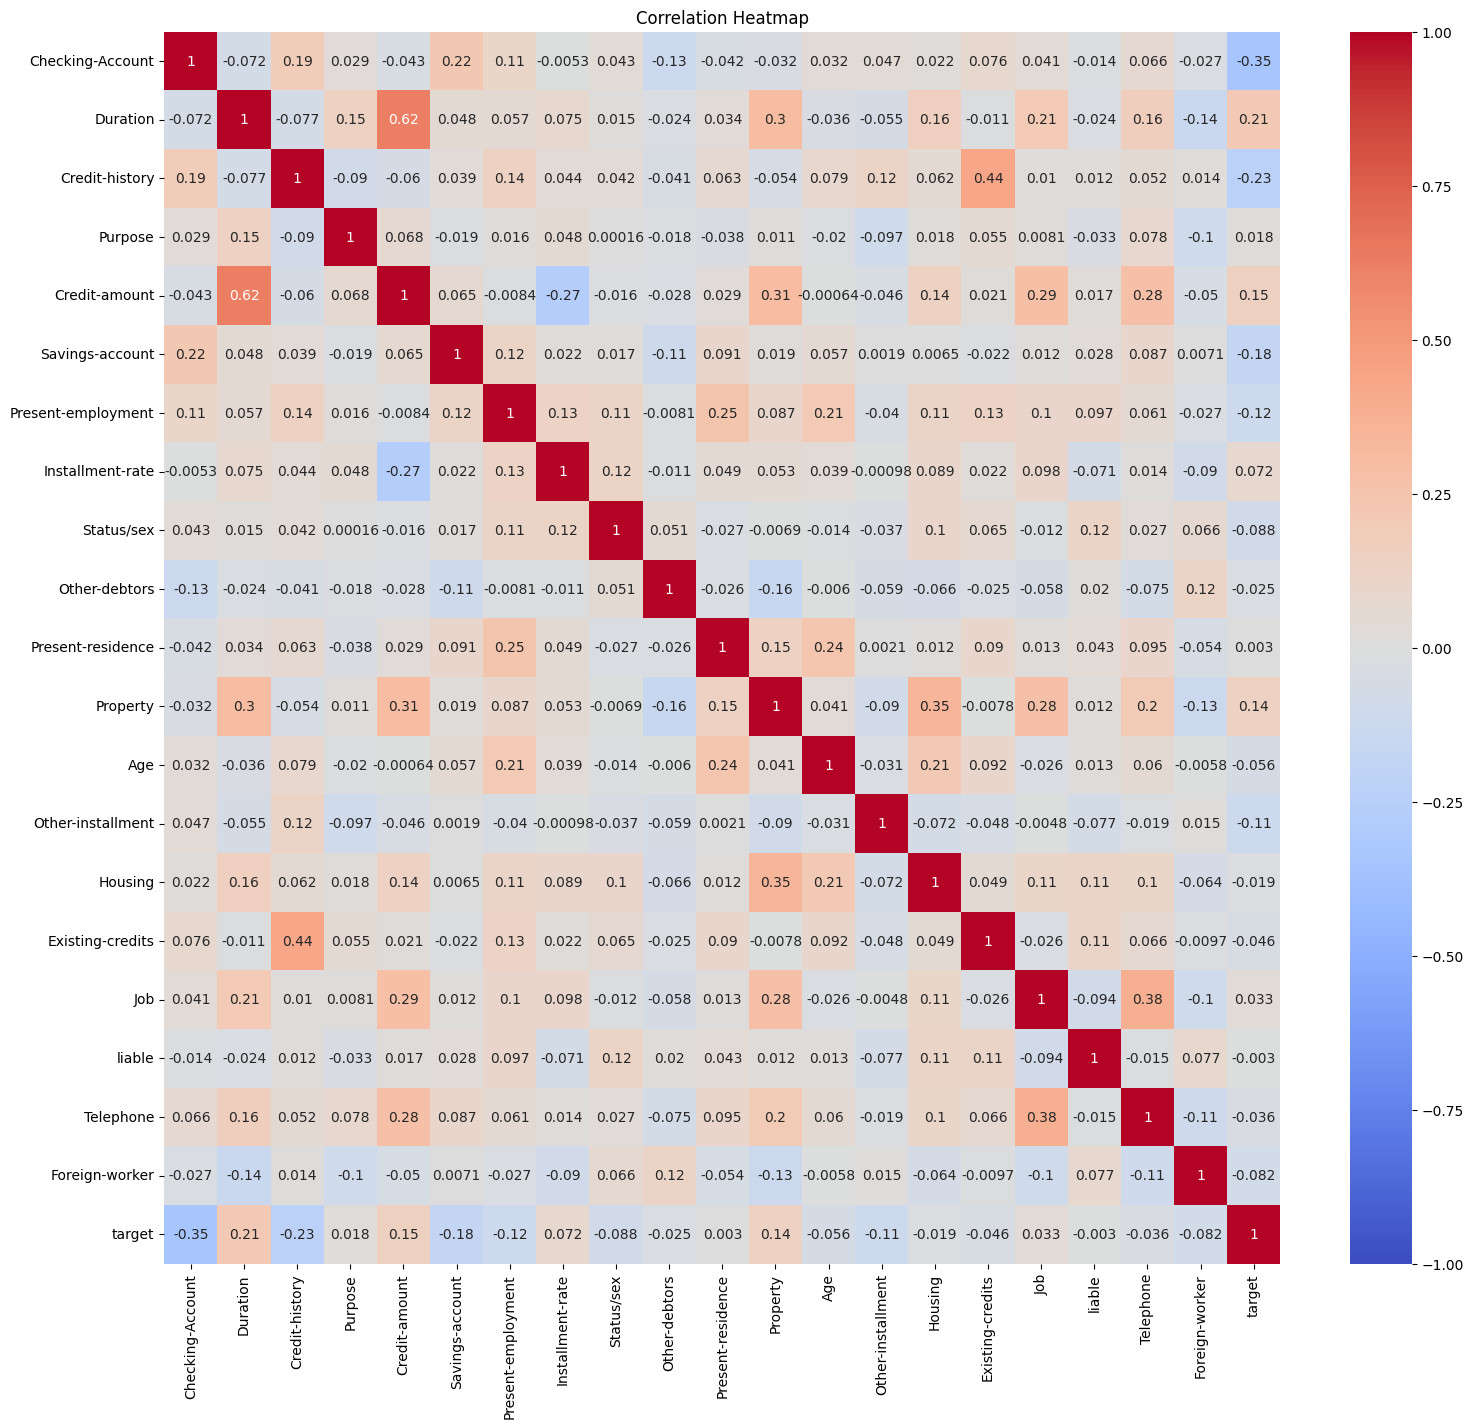

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()